In [3]:
!pip install prophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [5]:
# Carregue seus dados, defina a data como "ds" e a variável "Open" como "y"
data = pd.read_csv('/content/GE.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Open']]
data = data.rename(columns={'Date': 'ds', 'Open': 'y'})


In [16]:
# Crie e ajuste o modelo Prophet
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.add_country_holidays(country_name='US')
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpug5maby6/ragns7jz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpug5maby6/gge7eoz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94887', 'data', 'file=/tmp/tmpug5maby6/ragns7jz.json', 'init=/tmp/tmpug5maby6/gge7eoz3.json', 'output', 'file=/tmp/tmpug5maby6/prophet_modeli0wug21p/prophet_model-20231025053333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:

# Crie um DataFrame para as datas futuras que você deseja prever
future = model.make_future_dataframe(periods=60)  # 60 dias no futuro

# Faça as previsões para as datas futuras
forecast = model.predict(future)


In [19]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


            ds        yhat  yhat_lower  yhat_upper
0   2021-01-04   66.928153   63.825437   69.817697
1   2021-01-05   67.771307   65.007027   70.849246
2   2021-01-06   68.275275   65.182708   71.233422
3   2021-01-07   68.688921   65.354553   71.846255
4   2021-01-08   69.160617   66.000153   72.413387
..         ...         ...         ...         ...
745 2023-11-24  131.179830  127.698307  134.936632
746 2023-11-25  130.050429  126.686281  133.749620
747 2023-11-26  130.030683  126.293388  133.748136
748 2023-11-27  131.040210  127.606550  134.521838
749 2023-11-28  131.230010  127.737785  135.006641

[750 rows x 4 columns]


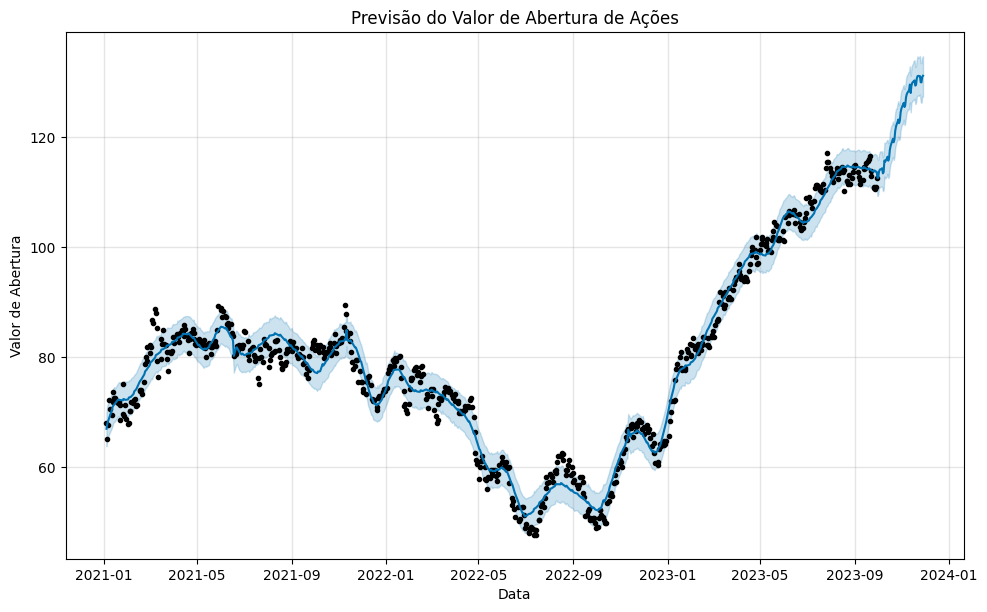

In [13]:

# Visualize as previsões
fig = model.plot(forecast)
plt.title('Previsão do Valor de Abertura de Ações')
plt.xlabel('Data')
plt.ylabel('Valor de Abertura')
plt.show()